# Classification on Urban spatial order data

Based on the research paper ['Urban spatial order:street network orientation, configuration, and entropy'](https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1) published by Geoff Boeing

## 1. Introduction

The paper "Urban Spatial Order: Street Network Orientation, Configuration, and Entropy" by Geoff Boeing examines street network patterns across 100 global cities. It utilizes OpenStreetMap data and OSMnx software to analyze street orientations and configurations. The study focuses on the entropy of street bearings and other metrics like average street segment length, circuity, node degree, and proportions of intersections and dead-ends. It also introduces a new measure, orientation-order, to quantify a city's grid-like structure. Statistical relationships between street orientation-order and other spatial order indicators are explored, revealing distinctive patterns in different regions, particularly between U.S./Canadian and other cities. The research provides insights into urban design and planning, highlighting the complexity and patterns of urban transportation systems worldwide.


By using the parameters explored in this paper, we aim to cluster the cities in this project. Apart from the indicators mentioned in this paper, we also introduce other features that might play a role in the development of the city, like city age, population, GDP per capita. The analysis on these indicators will direct us towards the crucial features that are to be looked into when it comes to planning and development of such cities in the future. The data for these features are collected from publically available sources.





## 2. Data Preparation

### 2.1 Loading the dataset

We start with loading relevant libraries that are needed to run the clustering analysis and get visualizations. 'Table 1' with different street entropy indicators is loaded into a dataframe. 

In [1]:
#Import data wrangling libraries
import numpy as np
import pandas as pd

#Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial.distance import euclidean

In [2]:
#Load data into the dataframe
df_city = pd.read_csv('Data_Table1.csv')
df_city.head()

,Region,City,Orientation-order indicator,Street orientation entropy,Weighted street orientation entropy,Median street segment length (meters),Average circuity,Average node degree,Proportion of nodes that are dead-ends,Proportion of nodes that are four-way intersections
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096


### 2.2 Feature Engineering

We also augment the dataset with additional features relevant to the city to understand their impact on the city layout. We are adding 'Country', 'City age', 'Population' and 'GDP per capita' columns to the existing dataset.

In [5]:
#Add new features to augment dataset
df_info = pd.read_csv('Additional_features.csv')
df_city = pd.merge(df_city,df_info,on='City')
df_city.head()

,Region,City,Orientation-order indicator,Street orientation entropy,Weighted street orientation entropy,Median street segment length (meters),Average circuity,Average node degree,Proportion of nodes that are dead-ends,Proportion of nodes that are four-way intersections,Country,City age,Population,GDP per capita
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,Thailand,1782,15567700,19705
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,China,-1045,21639100,23390
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,Vietnam,1010,4125000,10192
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,Hong Kong,1842,7267900,57244
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,Indonesia,1527,32183300,9984


In [6]:
#Label encoding for categorical features
label_encoder = LabelEncoder()
df_city['Country number'] = label_encoder.fit_transform(df_city['Country'])
df_city.head()

,Region,City,Orientation-order indicator,Street orientation entropy,Weighted street orientation entropy,Median street segment length (meters),Average circuity,Average node degree,Proportion of nodes that are dead-ends,Proportion of nodes that are four-way intersections,Country,City age,Population,GDP per capita,Country number
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,Thailand,1782,15567700,19705,54
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,China,-1045,21639100,23390,8
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,Vietnam,1010,4125000,10192,61
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,Hong Kong,1842,7267900,57244,19
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,Indonesia,1527,32183300,9984,23


### 2.3 Understanding the data

In [421]:
#Examine missing values and data type
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Region                                               100 non-null    object 
 1   City                                                 100 non-null    object 
 2   Orientation-order indicator                          100 non-null    float64
 3   Street orientation entropy                           100 non-null    float64
 4   Weighted street orientation entropy                  100 non-null    float64
 5   Median street segment length (meters)                100 non-null    float64
 6   Average circuity                                     100 non-null    float64
 7   Average node degree                                  100 non-null    float64
 8   Proportion of nodes that are dead-ends               100 non-null    fl

Except for Region,Country and City columns, all the other features are numerical. All the numerical features are non-null columns.

In [422]:
#Examine the summary statistics
df_city.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Region,100,5,US/Canada,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,100,100,Bangkok,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Orientation-order indicator,100.0,NaN,NaN,NaN,0.17879,0.224408,0.002,0.024,0.062,0.28475,0.899
Street orientation entropy,100.0,NaN,NaN,NaN,3.35127,0.323212,2.083,3.24425,3.5145,3.557,3.582
Weighted street orientation entropy,100.0,NaN,NaN,NaN,3.33923,0.337918,2.103,3.2335,3.4955,3.55325,3.581
Median street segment length (meters),100.0,NaN,NaN,NaN,82.99,27.941044,23.2,64.55,80.65,97.125,233.0
Average circuity,100.0,NaN,NaN,NaN,1.05598,0.027253,1.011,1.03675,1.0525,1.073,1.148
Average node degree,100.0,NaN,NaN,NaN,2.923,0.264333,2.348,2.71075,2.9475,3.10775,3.548
Proportion of nodes that are dead-ends,100.0,NaN,NaN,NaN,0.14758,0.080086,0.027,0.08375,0.1305,0.20425,0.395
Proportion of nodes that are four-way intersections,100.0,NaN,NaN,NaN,0.22808,0.126133,0.061,0.13825,0.191,0.3095,0.576


From the above summary, we can observe that the numerical feature are of different range of values. This is because the feature are measured in different units. 

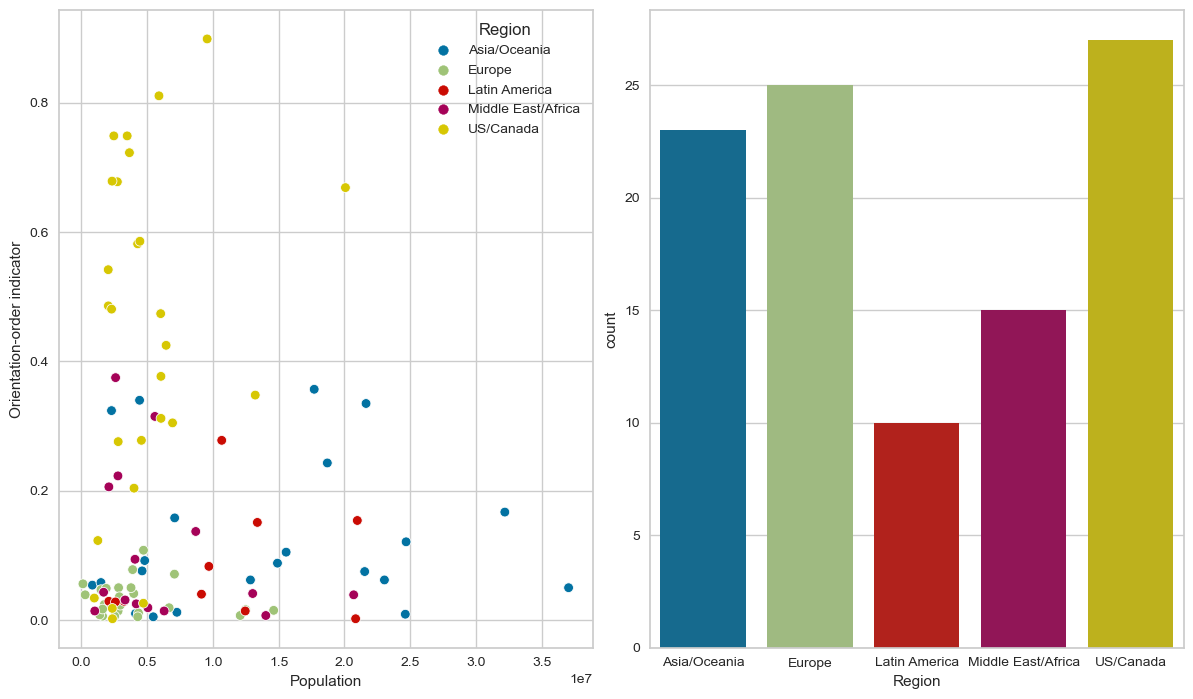

In [423]:
#Understand city distribution by country and region
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
fig.tight_layout()

sns.scatterplot(x='Population', y='Orientation-order indicator', hue='Region', data=df_city, ax=axes[0])
sns.countplot(x='Region', data = df_city)
plt.show()

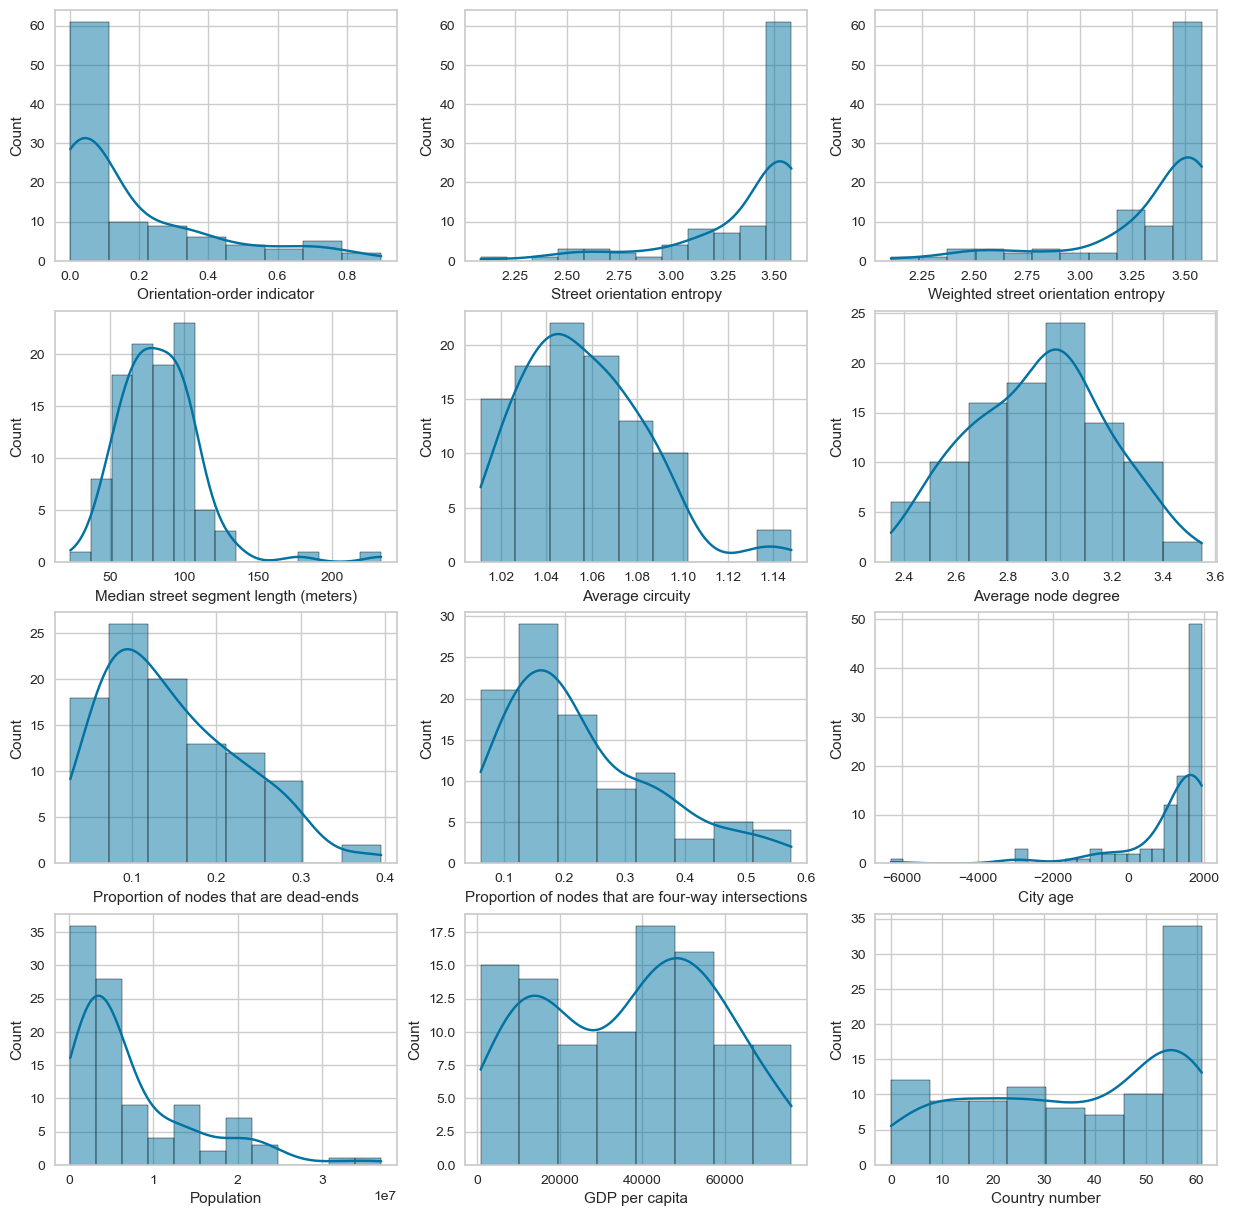

In [424]:
#Examine the distribution of the features
counter = 0

numerical_features = df_city.select_dtypes(include=["number"])
numerical_feature_names = numerical_features.columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(15, 15))

for column in numerical_feature_names:
    sns.histplot(data=df_city,x=column, ax=axes[int(counter/3) , counter % 3], kde=True)
    counter += 1

With this we can visualize how the data is distributed across its value range and we can also observe skewness on mutiple features. High variation in data range and skewness affect the clustering performace when it comes to distance-based clustering methods. Without scaling, features with larger scale may dominate the distance calculation.

Hence, to employ k-means and heirachical clustering we must normalize or scale our data.

## 3. Data Preprocessing

Normalization is the process of scaling the values between a fixed range of 0 and 1 and is typically used when features have different scales. Standardization rescales the data and centers it around a mean of 0 and a standard deviation of 1, and is typically used when the features are skewed. 

Since our objective is to get the best clustering solution, we will explore both normalization and standardization and compare their results.

### 3.1 Feature Selection

Selecting the feature that are used in the clustering process is important to reduce the number of features and to avoid the 'curse of dimensionality'. However with the current dataset, since the available data points are limited, we could keep all the features.

Correlation-based feature selection can be used to explore pairwise correlation between features and eliminate any features that are highly correlated with one another. High correlation between features incidicate redundancy, hence low inter-feature correlation should be preffered. This helps avoid multicollinearity.

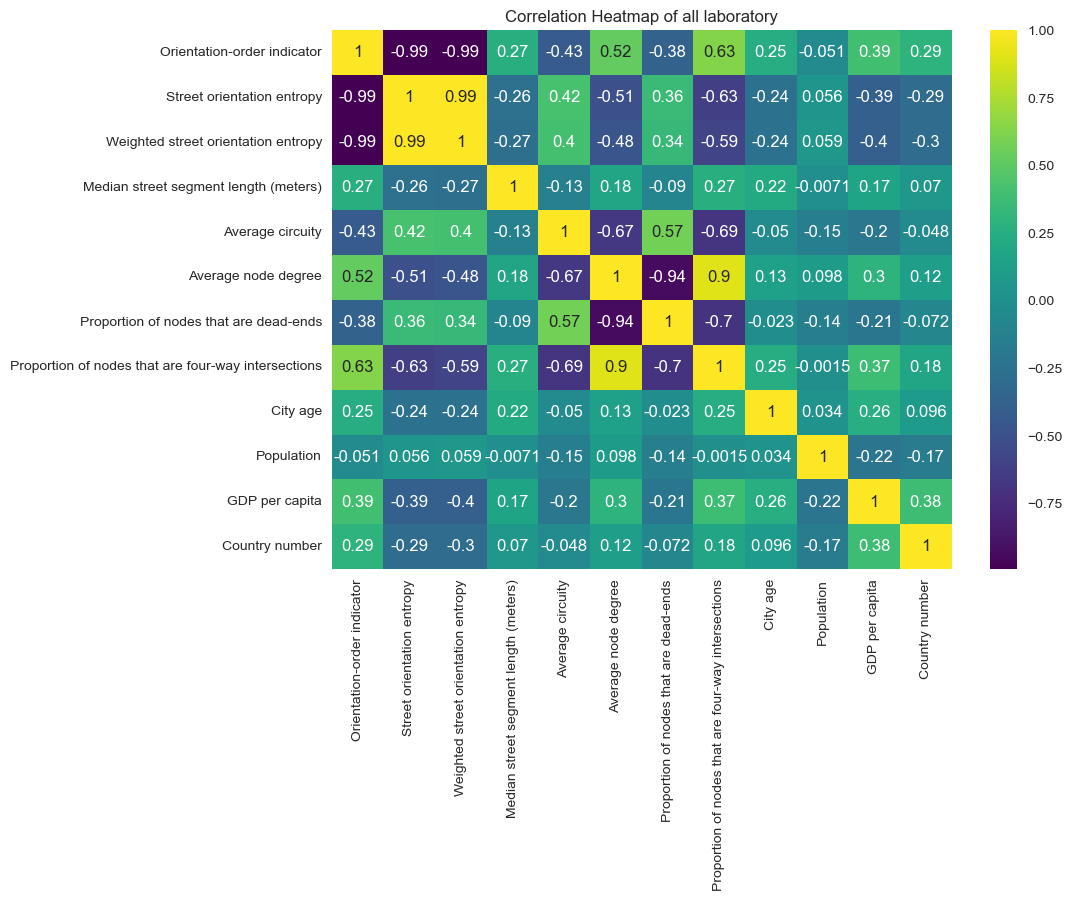

In [425]:
#Calculate the correlation matrix
correlation_matrix = df_city[numerical_feature_names].corr()

#Set figure size
plt.figure(figsize=(10,7))

sns.heatmap(correlation_matrix, cmap='viridis',annot=True)
plt.title('Correlation Heatmap of all laboratory')
plt.show()

From the correlation matrix, we learn that 'Orientation-order indicator', 'Street orientation entropy' and 'weighted street orientation entropy' are highly correlated with one another. 

From equation (3) of 'Urban spatial order:street network orientation, configuration, and entropy', we are aware that 'Orientation-order indicator' is calculated using street orientation indicators. Hence, moving forward we will remove both the street orientation indicators from the clustering process and only keep 'Orientation-order indicator'

-------------------------------------------------------------------------------------------------------------------

We observe another set of high correlation between 'Average node degree', 'Proportion of nodes that are dead-ends', and 'Proportion of nodes that are four-way intersections'. In an ideal grid city, the average node degree is ~4, as almost all nodes are 4-way intersections. Similarly, the average node degree is ~1 for an ideal non-grid city, as all the nodes are dead-ends. Also, as the number of 4-way intersection nodes increase, average node degree increases, and as the number of dead-ends increase, average node degree decreases. 

Hence, 'Average node degree' is highly positively and negatively correlated with 'Proportion of nodes that are four-way intersections' and 'Proportion of nodes that are dead-ends' respectively and should be removed to avoid redundancy.

### 3.2 Normalization

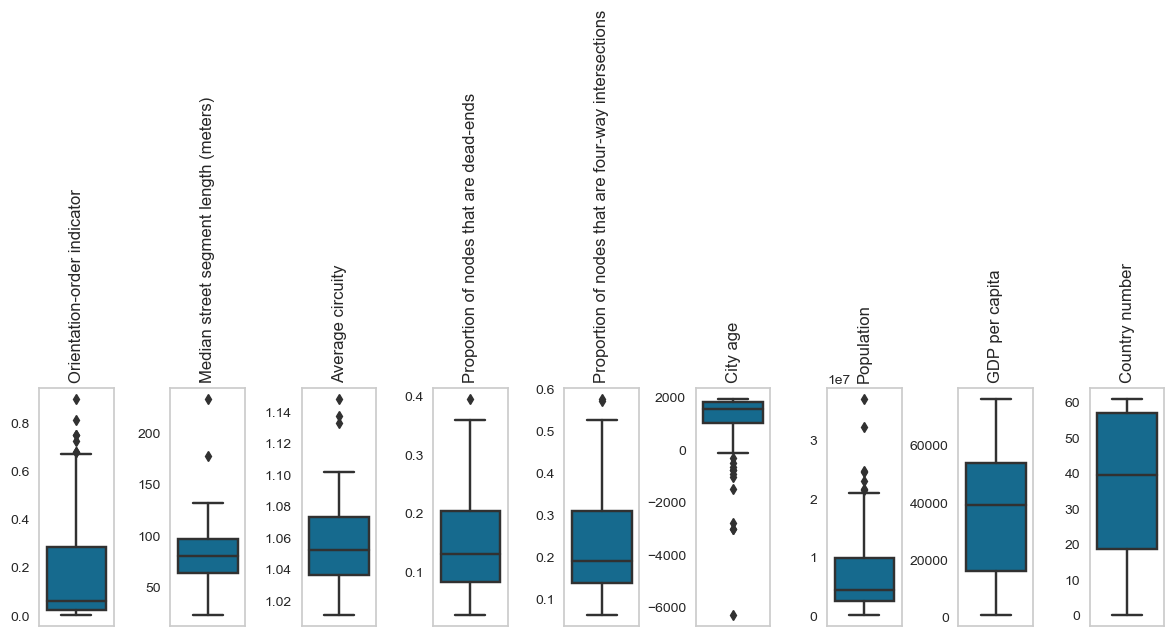

In [7]:
#Create dataframe with selected features
selected_columns = ['Orientation-order indicator','Median street segment length (meters)','Average circuity','Proportion of nodes that are dead-ends','Proportion of nodes that are four-way intersections','City age','Population','GDP per capita','Country number']
df_city_selected = df_city[selected_columns]

#Define counter
counter=0

#Visualize distribution
fig, axes = plt.subplots(1, 9, figsize=(12, 3))
fig.tight_layout()

for column in df_city_selected.columns:
    sns.boxplot(data=df_city_selected,y=column, ax=axes[counter])
    axes[counter].set_ylabel('')
    axes[counter].set_title(column,rotation=90)
    axes[counter].grid(False)
    counter += 1

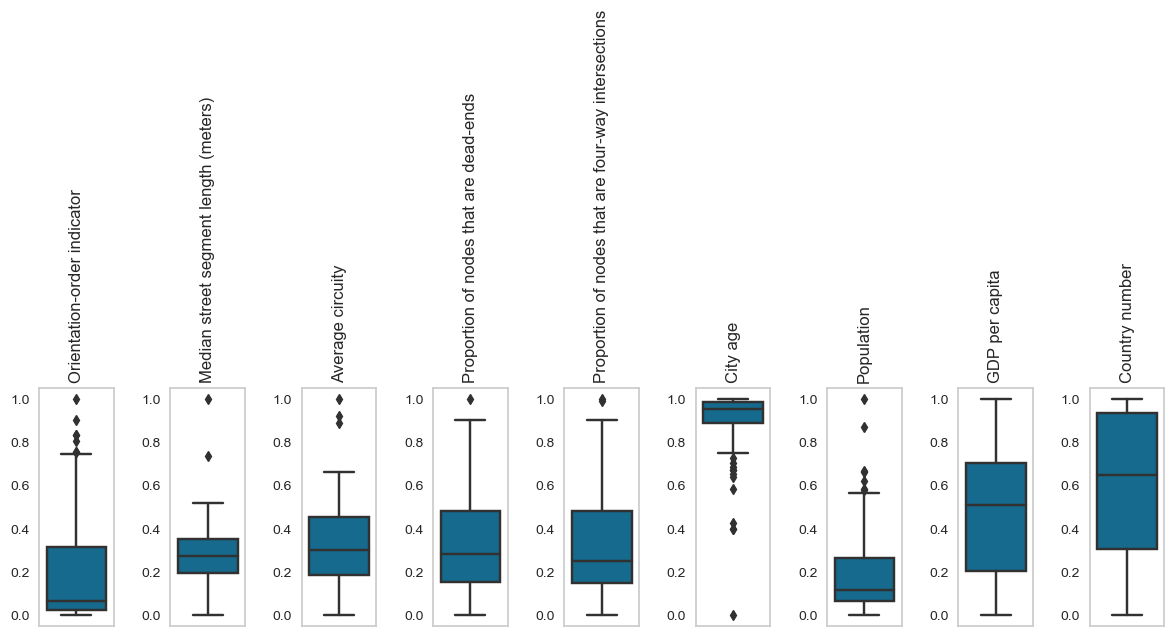

In [427]:
# Instantiate MinMaxScaler
norm = MinMaxScaler()

#Define counter
counter = 0

# MinMaxScaler
normalised_features = norm.fit_transform(df_city_selected)
normalised_df = pd.DataFrame(normalised_features, index = df_city_selected.index, columns = df_city_selected.columns)

#Visualize distribution
fig, axes = plt.subplots(1, 9, figsize=(12, 3))
fig.tight_layout()

for column in normalised_df.columns:
    sns.boxplot(data=normalised_df,y=column, ax=axes[counter])
    axes[counter].set_ylabel('')
    axes[counter].set_title(column,rotation=90)
    axes[counter].grid(False)
    counter += 1


All the features are scaled to a fixed range between 0 and 1

### 3.3 Standardization

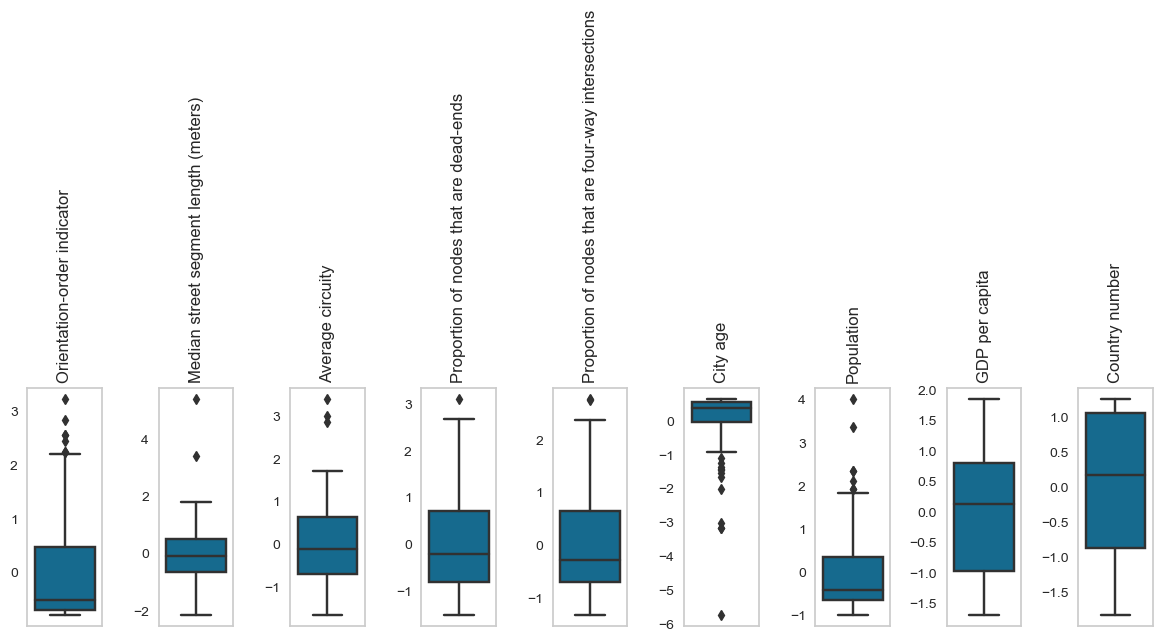

In [8]:
# Instantiate StandardScaler
standard = StandardScaler()

#Define counter
counter = 0

# StandardScaler
standard_features = standard.fit_transform(df_city_selected)
standard_df = pd.DataFrame(standard_features, index = df_city_selected.index, columns = df_city_selected.columns)

#Visualize distribution
fig, axes = plt.subplots(1, 9, figsize=(12, 3))
fig.tight_layout()

for column in standard_df.columns:
    sns.boxplot(data=standard_df,y=column, ax=axes[counter])
    axes[counter].set_ylabel('')
    axes[counter].set_title(column,rotation=90)
    axes[counter].grid(False)
    counter += 1


All the features are scaled and centered around 0 mean and 1 standard deviation

## 4. K-means Clustering Implementation

K-means is a distance-based iterative clustering method where clusters are formed by reassigning data points to K centroid and iterating until the lowest possible total intra-cluster distane is obtained. Number of cluster, K, must be specified before the clustering can begin.

To find the optimal K for any data set, elbow method can be employed.

### 4.1 Algorithm Overview

Step by step approach to K-means algorithm,

1) Initialize K centroids randomly
2) Repeat the following steps until no more reassignment is possible
    - Assign all the data points to the nearest centroid by calculating total intra-cluster distance
    - Recalculate centroid as the mean of the newly assigned data points for each cluster
3) Return cluster assignment and centroids

### 4.2 K-means Function Implementation

In [14]:
#Create a class to define variables and function 
class KMeansClustering:
    
    
    #Initiate user defined var - number of clusters,K , and default var - maximum number of iterations for step 2
    def __init__(self, cluster_count, iteration_count = 300):
        self.cluster_count = cluster_count
        self.iteration_count = iteration_count
        
        
        
        
    #Calculate squared distance between a data point and all cluster centroids to find the minimum distance   
    def _assign_clusters(self, df_cluster, centroids):
        
        assigned_class = []
        
        #Loop through all rows of data and calculate distance matrix for the selected row
        for i in range(df_cluster.shape[0]):
            row_dist = df_cluster[i] - centroids
            
            #Assigning arbitrary high value for distance for comparison
            distance = float('inf')
            
            #Calculate squared distance on the distance matrix 
            for row in range(row_dist.shape[0]):
                squared_distance = 0
                for col in range(row_dist.shape[1]):
                    squared_distance += row_dist[row][col] ** 2
                
                #Record cluster class by comparing squared distances
                if(squared_distance < distance):
                    min_row = row
                    distance = squared_distance
            
            #Add the selected cluster class to the assigned_class list
            assigned_class.append(min_row)
            
        #Return the list of assigned classes as a numpy array
        return np.array(assigned_class)
    
    
    
    
    #Calculate cluster means by grouping clusters by class
    def _calculate_cluster_mean(self, df_cluster, assigned_class):

        #Initialize array to strore new centroids
        cluster_means = np.zeros((self.cluster_count,df_cluster.shape[1]))
        
        #Loop through all cluster classes
        for i in range(self.cluster_count):

            #Get indices of all the data points with the selected class
            cluster_group = np.where(assigned_class==i)

            #Calculate mean of all the data points in same class
            cluster_means[i] = np.mean(df_cluster[cluster_group], axis=0)
            
        #Return newly calculated cluster centroids
        return cluster_means
    
    

        
    #Create function to implement step 2 iteratively. x and y represent the feature index for the scatter plot
    def compute(self, data, show_graph=False, x=0, y=1):
        
        #Convert data frame to 2D array
        df_cluster = data.values
        
        #Calculate initial cluster centroid by partitioning the dataset in K groups
        assigned_class = []
        for i in range(df_cluster.shape[0]):
            assigned_class.append(np.random.randint(0,self.cluster_count))
        self.centroids = self._calculate_cluster_mean(df_cluster, np.array(assigned_class))
        
        #Run loop until no change in centroid values
        for i in range(self.iteration_count):
            
            #Print scatter plot and the centroids to visualize cluster reassignment and centroid change 
            if(show_graph==True):
                if(i==0):
                    color = 'grey'
                else:
                    color = assigned_class
                plt.figure(figsize=(3,3))
                plt.scatter(data.iloc[:,x],data.iloc[:,y],c=color,cmap='viridis')
                plt.scatter(self.centroids[:,0],self.centroids[:,1],c='r',s=100)
                plt.grid(False)
                plt.show()
            
            #Reassign cluster based on the shortest distance
            assigned_class = self._assign_clusters(df_cluster,self.centroids)
            
            #Group data points by assigned class and recalculate centroids
            new_centroids=self._calculate_cluster_mean(df_cluster, assigned_class)
            
            #Break loop if centroids are same else reassign centroid for recalculation
            mask = ~(np.isnan(self.centroids) | np.isnan(new_centroids))
            if(np.allclose(self.centroids[mask],new_centroids[mask])):
                if(show_graph == True):
                    print("Number of iterations:" , i+1)
                break
            self.centroids = new_centroids
            
        #Return results
        self.clusters = assigned_class

### 4.3 Limitations and Challenges

The K-Means algorithm begins with initializing K centroids randomly and moves iteratively reassigning data points to the nearest centroids and recalculating the centroid means. This means the final cluster assignment sometimes is dependent on the initial centroid positions. This leads to incorrect clustering results and hence it is important to re-run the clustering algorithm until desired result is reached. 

During the implementation of K-means clustering, with the initial attempts of random centroid initialization, the frequency of sub-optimal clustering results was high. Hence, we are implementing 'Random-Partition Initializtion' technique to split the dataset into K cluster by randomly assinging data points to a class and calculating centroid mean. This helps us with reducing the frequency sub-optimal clustering results.

Example 1: Sub-optimal clustering result

/var/folders/89/shr6mg0s3q3c66hlnqmcskl80000gn/T/ipykernel_29398/218311584.py:88: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data.iloc[:,x],data.iloc[:,y],c=color,cmap='viridis')


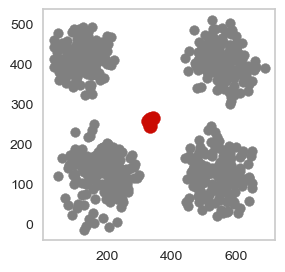

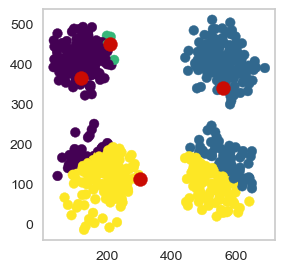

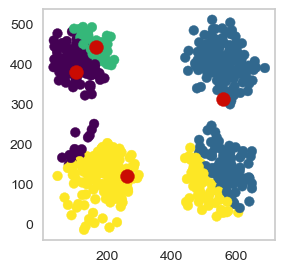

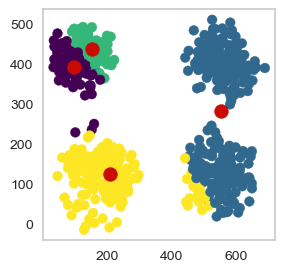

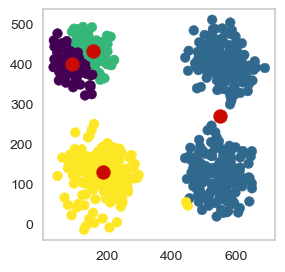

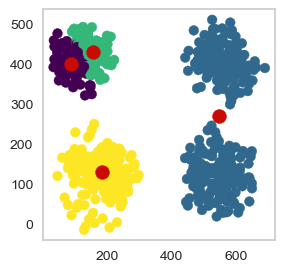

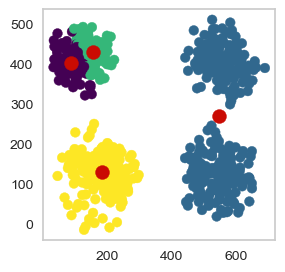

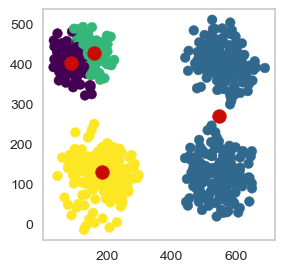

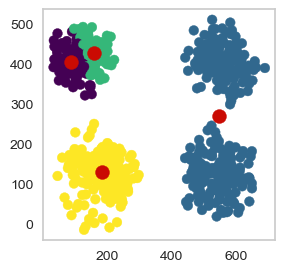

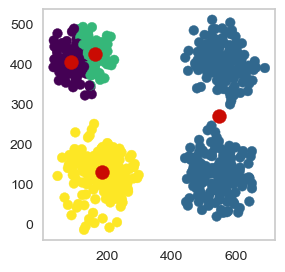

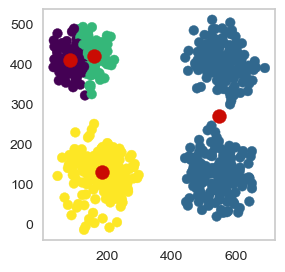

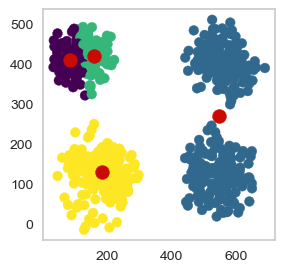

Number of iterations: 12


In [25]:
df = pd.read_csv('data-2.csv')
kmeans = KMeansClustering(4)
kmeans.compute(df.iloc[:,0:2],show_graph=True,x=0,y=1)

Example 2: Desired clustering result

/var/folders/89/shr6mg0s3q3c66hlnqmcskl80000gn/T/ipykernel_29398/218311584.py:88: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data.iloc[:,x],data.iloc[:,y],c=color,cmap='viridis')


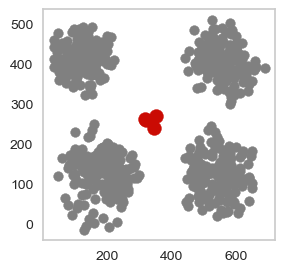

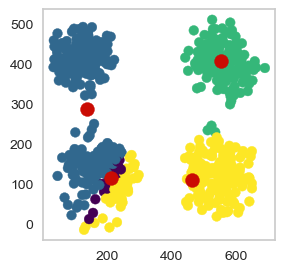

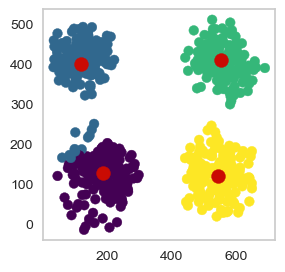

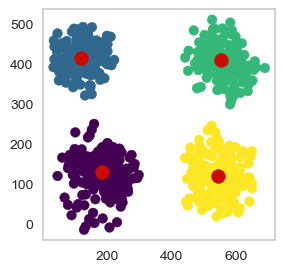

Number of iterations: 4


In [34]:
kmeans = KMeansClustering(4)
kmeans.compute(df.iloc[:,0:2],show_graph=True,x=0,y=1)

### 4.4 Elbow method 

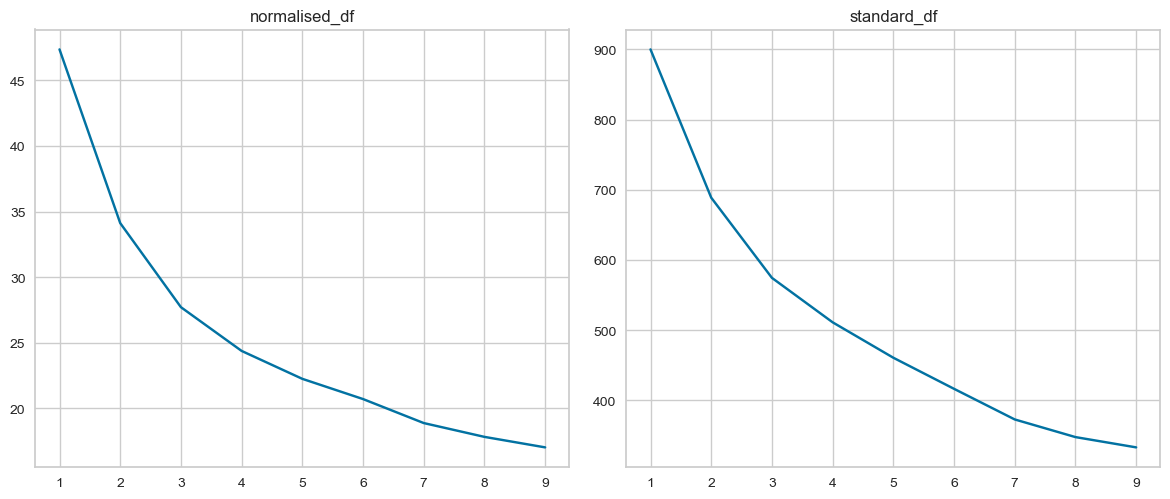

In [432]:
#Create elbow method fuction
def elbow_method(df_cluster):
    cluster_count = []
    squared_distance = []
    
    #Loop through K from 1 to 10 
    for i in range(1,10):
        
        #Employ K-Means algorithm to get the squared distance for each K
        mdl = KMeans(n_clusters=i, n_init=10)
        mdl.fit(df_cluster.iloc[:,0:9])
        cluster_count.append(i)
        squared_distance.append(mdl.inertia_)
        
    return cluster_count,squared_distance

#Set plot area and size
fig,axes = plt.subplots(1, 2, figsize=(12,5))
fig.tight_layout()

#Set dataset variables
df=[normalised_df,standard_df]
df_name =['normalised_df','standard_df']
        
#Plot elbow graphs for both datasets
for i in range(2):
    cluster_count,squared_distance = elbow_method(df[i])
    axes[i].plot(cluster_count,squared_distance)
    axes[i].set_title(df_name[i])


With the elbow method,

For normalized_df, it seems that the elbow might be created at K=3 or K=4. Hence the optimal number of clusters could be 3 or 4.

For standard_df, it looks like the elbow could be at K=3 or K=7. Hence the optimal number of clusters could be 3 or 7.

To get a concrete K value for both the normalized and standardized dataset, we can employ silhouette method to validate the numbers from the elbow method.


#### 4.4.1 Silhouette Method

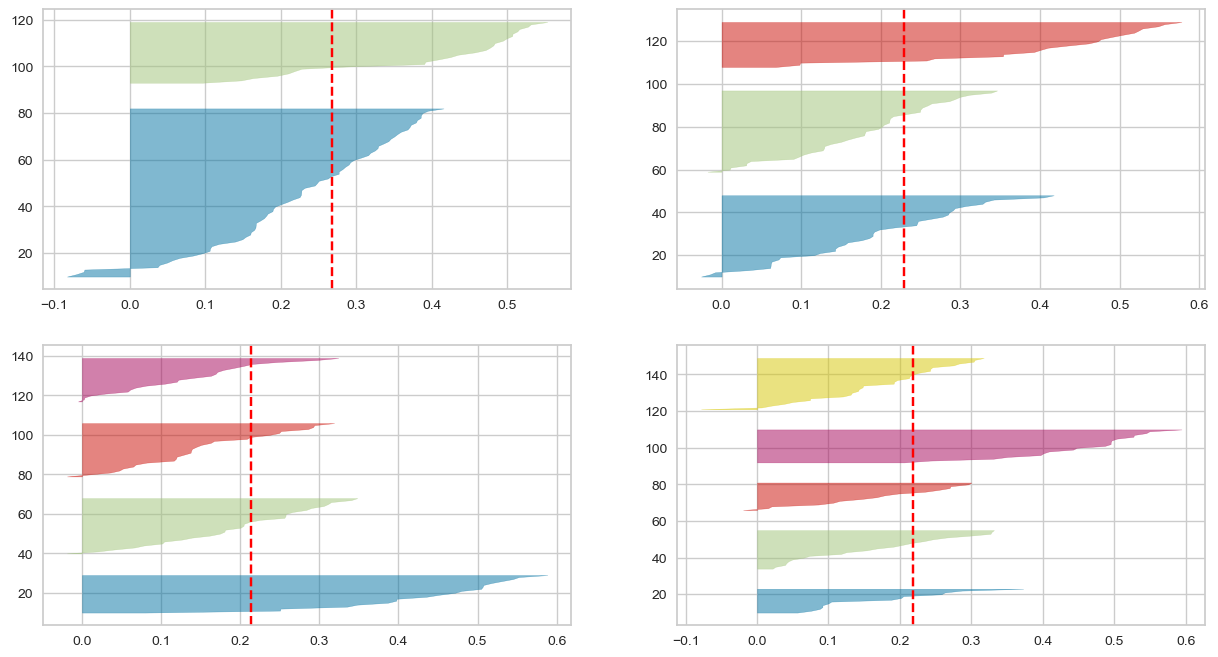

In [433]:
#Initialize data and plot area
df = normalised_df
fig, ax = plt.subplots(2, 2, figsize=(15,8))

#Plot area chart to visualize silhouette score
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df) 
    

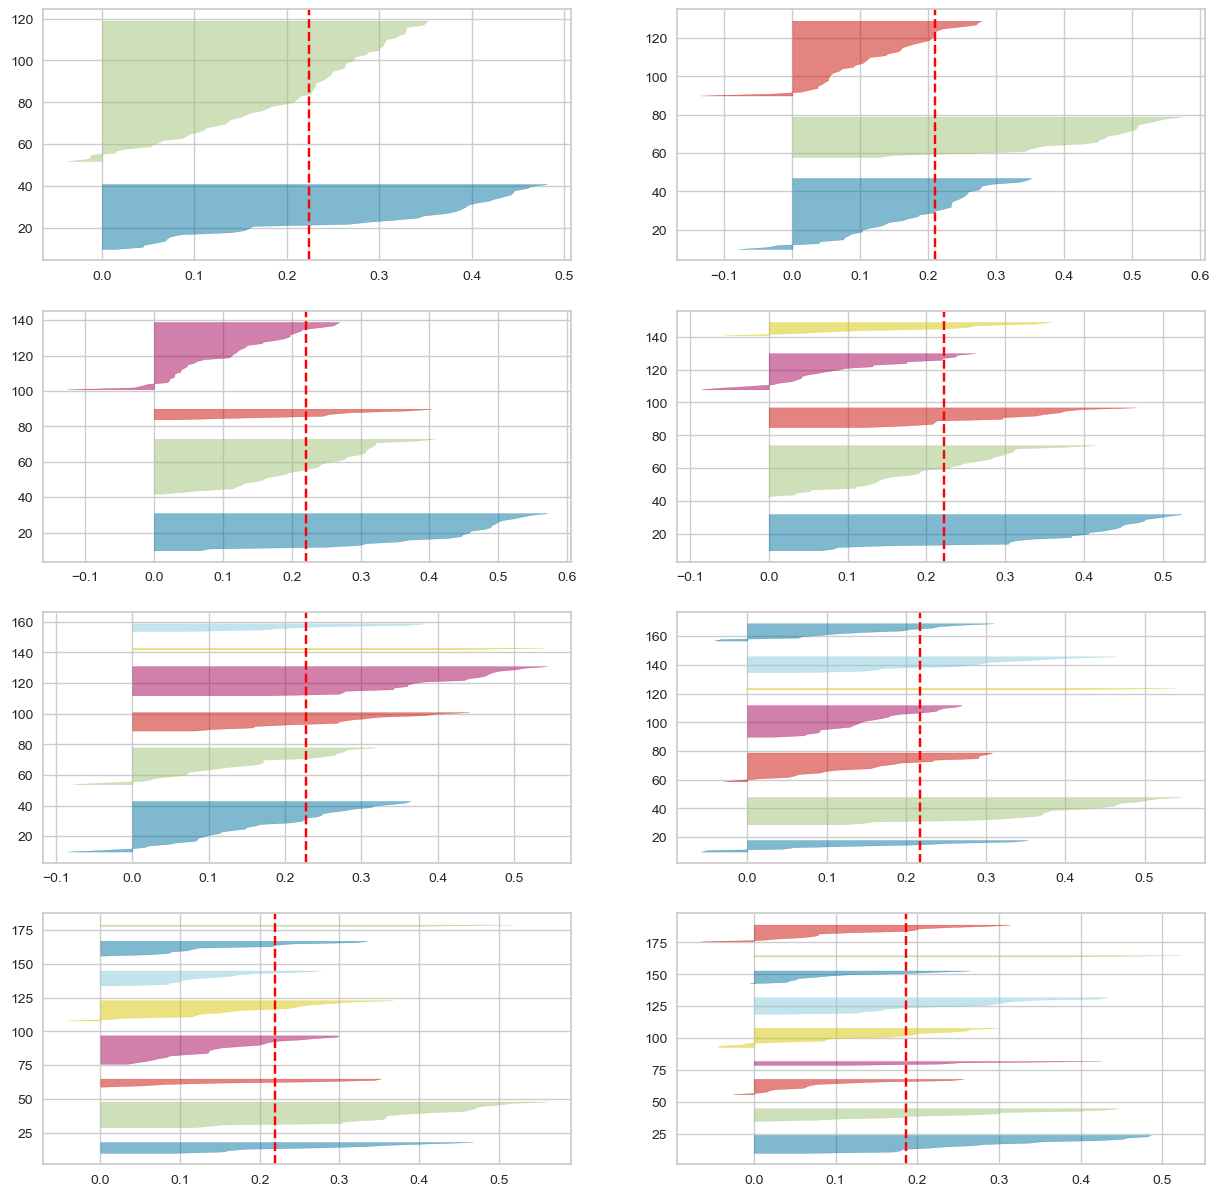

In [434]:
#Initialize data and plot area
df = standard_df
fig, ax = plt.subplots(4,2, figsize=(15,15))

#Plot area chart to visualize silhouette score
for i in [2,3,4,5,6,7,8,9]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df) 
    

With the sihouette score, we validate the elbow method results. For normalised_df, we take a cluster value of K=4, as the clusters are evenly split and the average score of all the data sub-sets are greater than the sihouette score, represented by the red-dotted line. For standard_df, we take the cluster value of K=7, as K=3 has wide fluctuations between clusters, as the size of each cluster is very different.

Since, standard_df gives us more fexibility to validate the data and helps us compare the results better, we will be moving forward with the standardized dataset for analysis.

## 6. Applying Custom Clustering Methods on Urban Spatial Order Data

### 6.1 K-Means Clustering

In [440]:
df = standard_df

#Apply custom KMeansClustering - Cluster count is taken as 7 as per elbow method
kmeans = KMeansClustering(7)
kmeans.compute(df.iloc[:,0:9],show_graph=False,x=0,y=4)
assigned_class = kmeans.clusters
centroids = kmeans.centroids

#Printing Clustering results
print("Class")
print(assigned_class)
print("\nCentroids")
print(centroids)

Class
[0 0 4 4 3 0 1 4 3 1 6 0 0 3 6 0 3 0 2 4 2 3 0 4 6 2 6 6 6 4 4 4 0 4 4 2 2
 6 4 3 4 4 4 0 4 4 6 4 6 6 0 6 1 3 0 0 3 3 3 3 0 1 4 4 3 4 0 0 1 0 4 2 2 2
 4 5 2 2 5 5 4 2 2 2 5 5 5 6 2 2 5 2 2 5 5 5 2 6 5 5]

Centroids
[[-0.51699862  0.59873032  0.85977897  0.97009884 -0.7215158   0.117684
   0.36608431 -1.18503009 -0.3779825 ]
 [ 0.00273196 -0.83486243 -1.03922318 -0.93593492  0.64318473  0.31850635
   0.20905569 -1.30057994  0.21113529]
 [ 0.30673067  0.40921808 -0.13243314 -0.32868297  0.27514722  0.3878006
  -0.3145962   0.85330071  0.93629753]
 [-0.30248594 -0.81855606 -0.29735993 -0.5824599  -0.27487276 -0.55210765
   1.51135876 -0.44761876 -0.44201704]
 [-0.64651204 -0.45082853  0.71264408  0.84389865 -0.82689438 -0.56333401
  -0.54728456  0.21775323  0.05219495]
 [ 2.00064396  0.50483818 -1.09945731 -0.90979032  1.68727094  0.5416993
  -0.2106258   1.1318879   0.84065937]
 [-0.17338113  0.05874169 -0.51271823 -0.56910604  0.47438367  0.19292398
  -0.35594083 -0.14850429 -1.34

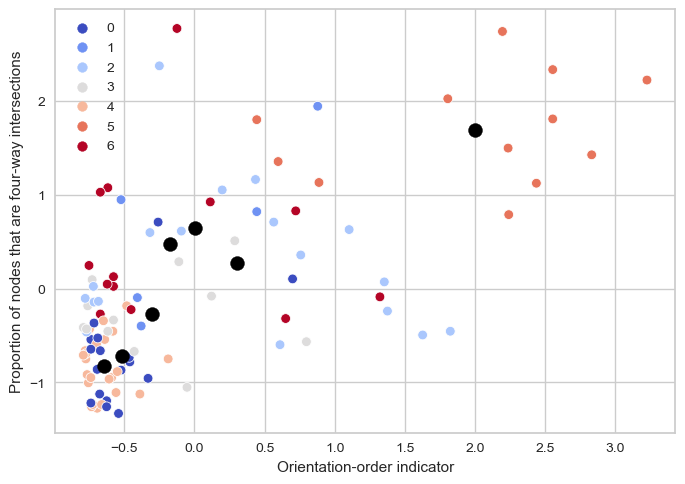

In [441]:
#Plot assigned class and centroid on a scatter plot
sns.scatterplot(data=df,x=df['Orientation-order indicator'],y=df['Proportion of nodes that are four-way intersections'],hue=assigned_class,palette='coolwarm')
plt.scatter(centroids[:, 0], centroids[:, 4], s = 100, c = 'black', label = 'Centroids')
plt.show()

In [442]:
df_city['class'] = assigned_class
for i in range(7):
    print('Class : ', i)
    cluster = df_city['class']==i
    print(df_city.loc[cluster,'City'])

Class :  0
0            Bangkok
1            Beijing
5              Kabul
11            Mumbai
12         New Delhi
15         Pyongyang
17          Shanghai
22       Ulaanbaatar
32              Kiev
43          Sarajevo
50           Caracas
54    Port au Prince
55    Rio de Janeiro
60         Cape Town
66      Johannesburg
67             Lagos
69           Nairobi
Name: City, dtype: object
Class :  1
6        Karachi
9         Manila
52          Lima
61    Casablanca
68     Mogadishu
Name: City, dtype: object
Class :  2
18      Singapore
20         Taipei
25      Barcelona
35         Madrid
36         Moscow
71        Atlanta
72      Baltimore
73         Boston
76      Cleveland
77         Dallas
81        Houston
82      Las Vegas
83    Los Angeles
88    New Orleans
89        Orlando
91        Phoenix
92     Pittsburgh
96       St Louis
Name: City, dtype: object
Class :  3
4         Jakarta
8           Kyoto
13          Osaka
16          Seoul
21          Tokyo
39          Paris
53  

In an ideal grid like city, creating more number of 4 way intersection would be easier, than in an non-grid city. Hence, we can expect cities with more order to have high number of 4 way intersections.

From the scatter plot, we can see cities like 'Bangkok', 'Kabul etc have less 4 way intersection, hence order is low and for cities like 'Baltimore', 'Chicago' the 4 way intersection proportion is high and hence the order is also high. 

###### Hence, creating visualization between 'Orientation-order indicator' and 'Proportion of nodes that are four way intersections' will help us validate the clustering solutions.


## 7. Conclusions

From the list of cities below we can make the following observation,

Class 0 : We can clearly see the city age has played an important part in this cluster. We see population and region also play a rolw in clustering for this group

Class 1: We see cities that are highly ordered in this cluster. This includes cities in USA and Canada, there is also a similarity in city GDP and 4-way proportion

Class 2: These cities are from the european region and have very less 4-way proportion. USA cities with european layout are classified under this class

Class 3: This class has most of the countries from the south-east asia region 

Class 4: This has the most densly populated cities in china. This seems to take into account the population and the GDP values

Class 5: Similar to Class 2, but these cities have less population and GDP compared to Class 2

Class 6: These are a mix of cities from different region of the world and seems to be clustered based on different features combined


In [447]:
df_city['class'] = assigned_class
df_city = df_city.rename(columns={'Orientation-order indicator': 'Order', 
                        'Proportion of nodes that are four-way intersections': '4way',
                                'GDP per capita':'GDP'})
for i in range(7):
    print('Class : ', i)
    cluster = df_city['class']==i
    print(df_city.loc[cluster,('City','Order','4way','Population','City age','GDP','Country')])

Class :  0
              City  Order   4way  Population  City age    GDP       Country
0          Bangkok  0.105  0.108    15567700      1782  19705      Thailand
1          Beijing  0.335  0.241    21639100     -1045  23390         China
5            Kabul  0.076  0.130     4625000     -1500   1297    Afganistan
11          Mumbai  0.075  0.136    21535600      1668   7005         India
12       New Delhi  0.062  0.119    23036600      1911  12747         India
15       Pyongyang  0.024  0.120     2870000      1946    800   North Korea
17        Shanghai  0.121  0.317    24683400      1291  24065         China
22     Ulaanbaatar  0.058  0.061     1500000      1639  13400      Mongolia
32            Kiev  0.014  0.160     2800000       482  12100       Ukraine
43        Sarajevo  0.039  0.078      300000      1461  14400        Bosnia
50         Caracas  0.029  0.145     3260200      1567  15890     Venezuela
54  Port au Prince  0.028  0.087     2600000      1749   2000         Haiti
5